## Final Project Submission

Please fill out:
* Student name: Mit Patel 
* Student pace: Part time
* Scheduled project review date/time: Jan 29th 2019 3:45pm
* Instructor name: Jeff Harmen
* Blog post URL: https://mitpatel5.github.io/feature_selection


## Introduction 
We will exproling the concept of the Linear Reggeration with multiple features as part of module one project. The DataSet Given here is sales data for King County,WA. The data set he total 21 field an with around 21000 Data.

## Step 1:- Packages and Data
- Lets import all the necessary packages we think we might use.
- Then we will use the Pandas DataFrame Object to read the Dataset Stored in csv file

In [1]:
# Your code here - remember to use markdown cells for comments as well!
#importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import minmax_scale

In [2]:
# storing the data set in the Pandas DataFrame
main_df = pd.read_csv("kc_house_data.csv")

## Setp 2:- Visualizing The Data in Histogram
- Now we will use the basic visualizing attributs for Pandas DataFrame to get the brief view of over data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A89281C9E8>,
      dtype=object)

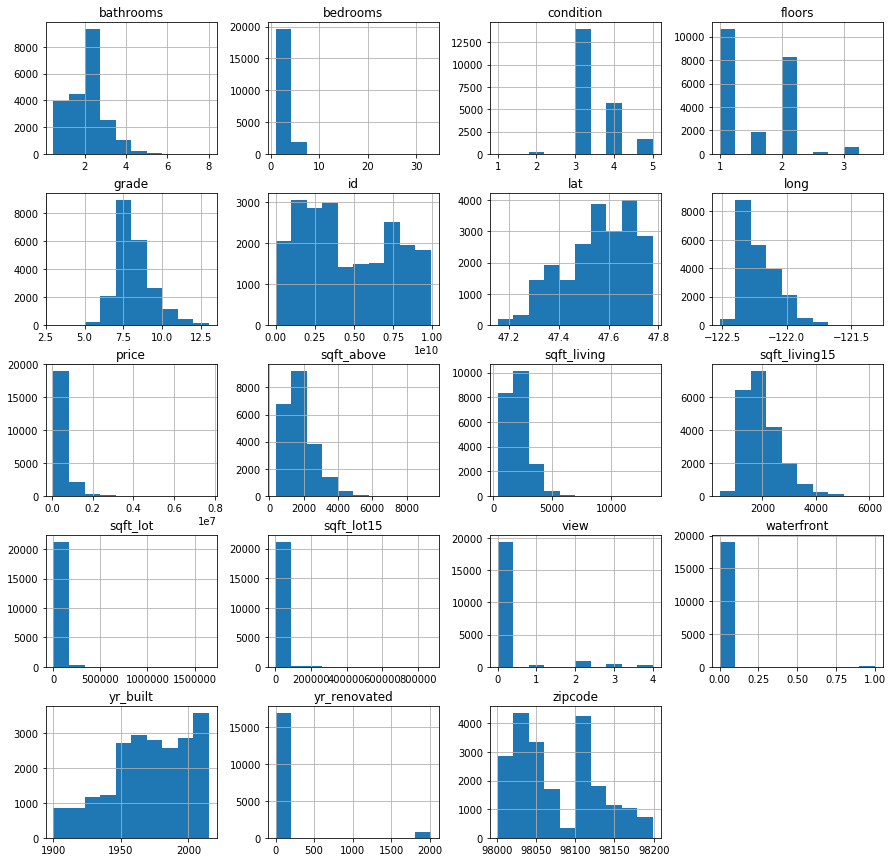

In [3]:
main_df.hist(figsize=(15,15))

`.hist` helps you to display a nice histogram for the continous variabel. Now lets have closer look on over target variabel i.e. Price

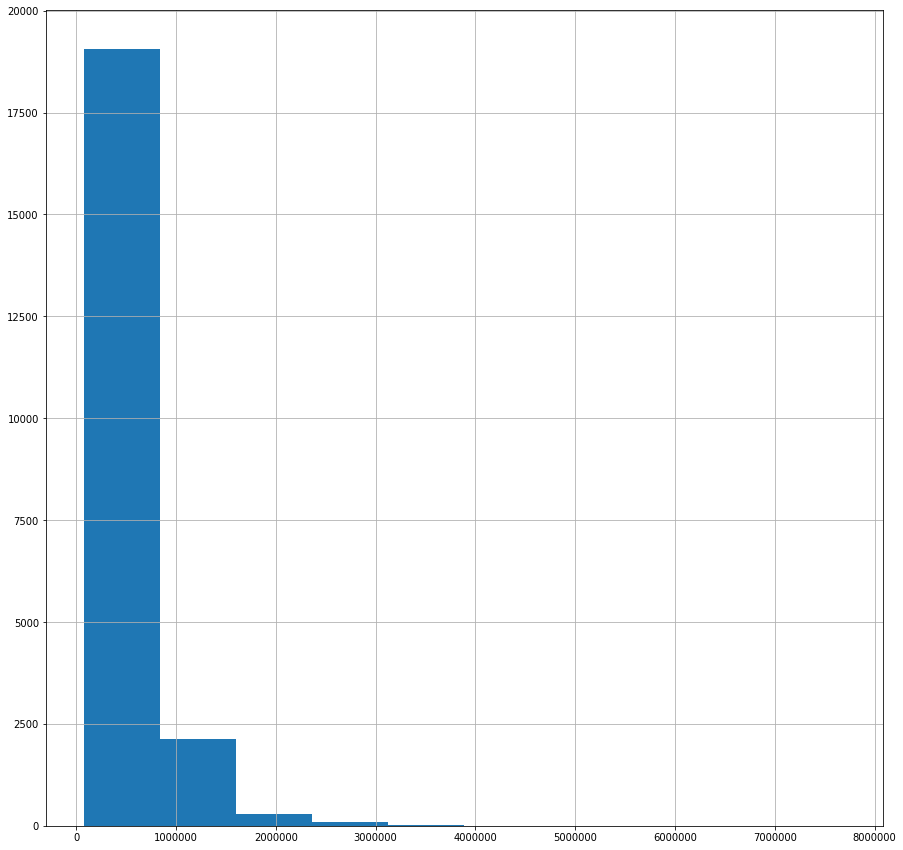

In [4]:
main_df.price.hist(figsize=(15,15))

## Obsrvation from the above histogram
- The Data is not Normally Distributed
- There is precence of lot of left skweness in the file

## Step 3:- Data Preprocessing

As we noticed earlier the target data is highly skweed let just drop the data with price greater the **2Mill** 

I made this decision based on the sales data from one of the real estate website **Zillow** according to records only **502** houes where sold beyond the price of **2Mill** in period of 6 months

<img src="Price_Above_2mil.PNG" style="width: 1000px;"/>

In [6]:
price_cut_df = main_df.drop(main_df[main_df.price > 2000000].index)

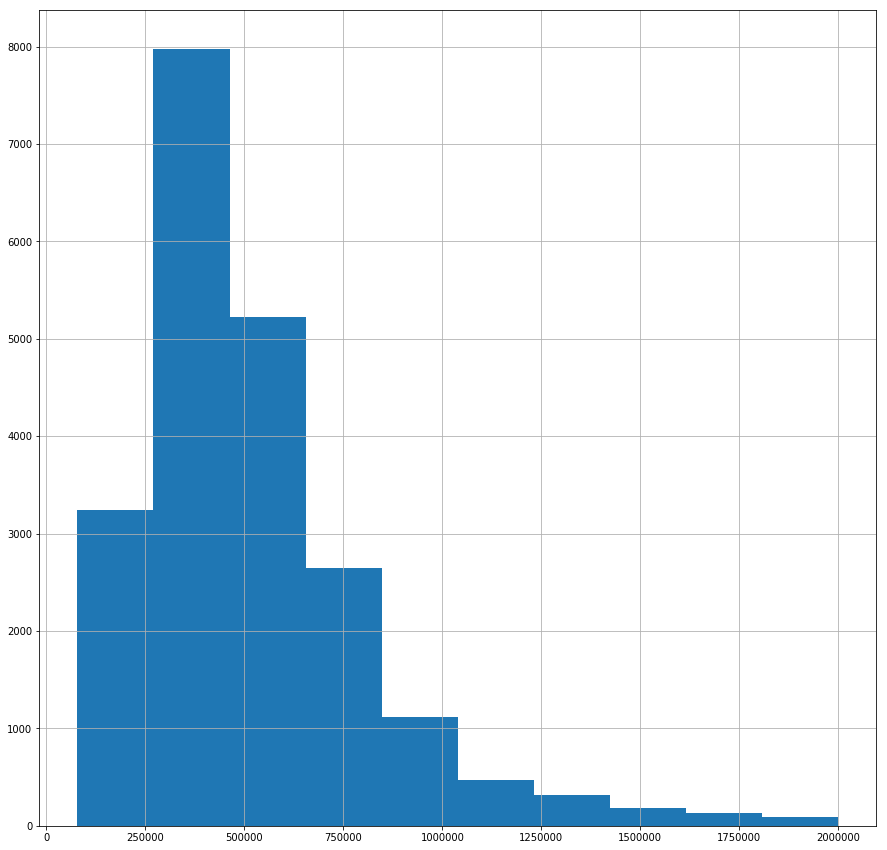

In [7]:
price_cut_df.price.hist(figsize=(15,15))

Data is still skewed but look lot more distrubuted now.

Now lets check the if there is presence of `Nan` values in any fields using .isna attribute for pandas

In [8]:
price_cut_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2361
view               62
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3806
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

3 Columns have presence of `NaN` vales which we would either like to remove the replace the `NaN` with 0 for current situation. Also the field sqft_basement has a special Charater `?` we would also replace it with 0 and convert it as float data type from object

In [9]:
price_cut_df.waterfront = price_cut_df.waterfront.fillna(0)
price_cut_df.yr_renovated = price_cut_df.yr_renovated.fillna(0)
price_cut_df.view = price_cut_df.view.fillna(0)
price_cut_df.sqft_basement = price_cut_df.sqft_basement.replace('?',0)
price_cut_df.sqft_basement = price_cut_df.sqft_basement.astype(str).astype(float)

Now Let's perform normalization on our traget field i.e. price. We will use `log1p` transform to normalize the data

In [10]:
price_cut_df['log_price'] = np.log1p(price_cut_df.price)

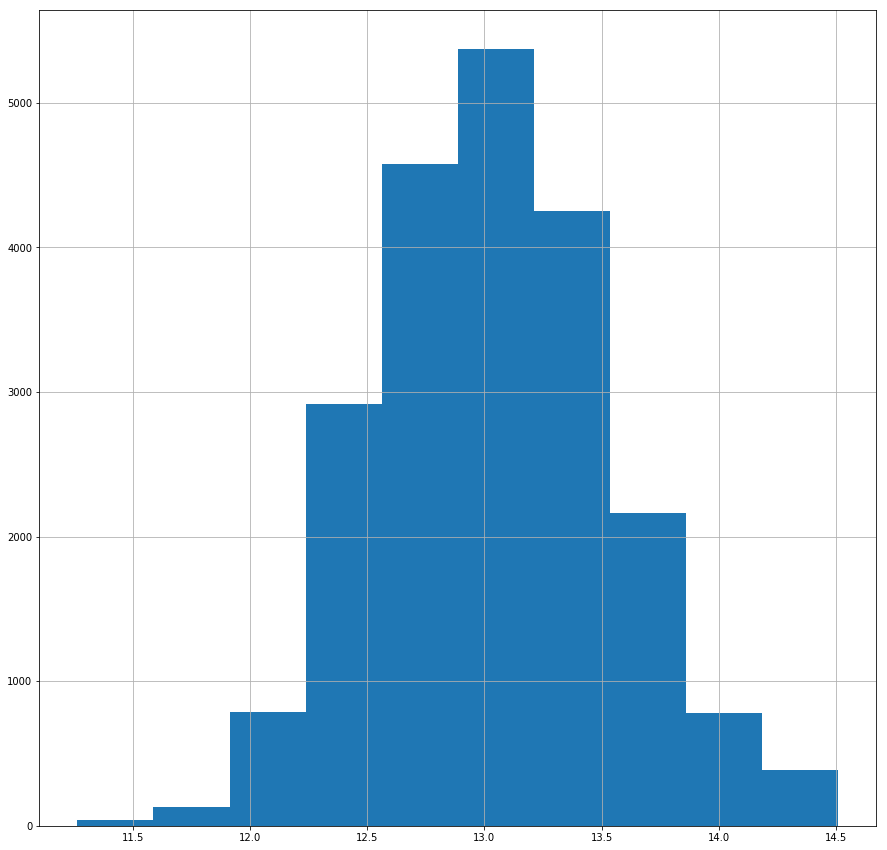

In [11]:
price_cut_df.log_price.hist(figsize=(15,15))

As you see price is now more normally distributed then before

In [12]:
price_cut_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21399 entries, 0 to 21596
Data columns (total 22 columns):
id               21399 non-null int64
date             21399 non-null object
price            21399 non-null float64
bedrooms         21399 non-null int64
bathrooms        21399 non-null float64
sqft_living      21399 non-null int64
sqft_lot         21399 non-null int64
floors           21399 non-null float64
waterfront       21399 non-null float64
view             21399 non-null float64
condition        21399 non-null int64
grade            21399 non-null int64
sqft_above       21399 non-null int64
sqft_basement    21399 non-null float64
yr_built         21399 non-null int64
yr_renovated     21399 non-null float64
zipcode          21399 non-null int64
lat              21399 non-null float64
long             21399 non-null float64
sqft_living15    21399 non-null int64
sqft_lot15       21399 non-null int64
log_price        21399 non-null float64
dtypes: float64(10), int64(11), ob

## Step 3 :- R-squared values

Now lets creat a new DataFrame for OLS to get the R-squared value as closer to 1 as possible. In this we might need to add and remove the fileds to get the best R-squared Values.

In [13]:
ols_testing = pd.DataFrame([])
ols_testing['log_price'] = price_cut_df.log_price
ols_testing['sqft_living'] = price_cut_df.sqft_living
ols_testing['yr_renovated'] = price_cut_df.yr_renovated
ols_testing['grade'] = price_cut_df.grade
ols_testing['zipcode'] = price_cut_df.zipcode
ols_testing['lat'] = price_cut_df.lat
ols_testing['yr_build'] = price_cut_df.yr_built

In [14]:
ols_testing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21399 entries, 0 to 21596
Data columns (total 7 columns):
log_price       21399 non-null float64
sqft_living     21399 non-null int64
yr_renovated    21399 non-null float64
grade           21399 non-null int64
zipcode         21399 non-null int64
lat             21399 non-null float64
yr_build        21399 non-null int64
dtypes: float64(3), int64(4)
memory usage: 1.3 MB


OLS requires formula to start with so in below block of code we have created formula for OLS

In [16]:
outcome = 'log_price'
predictors = ols_testing.drop('log_price',axis=1)
predi_sum = "+".join(predictors.columns)
formula = outcome + "~" + predi_sum

Import ols from statsmodels package 

In [17]:
from statsmodels.formula.api import ols

We can pass the formula with variable name `ols` along with `.fit()` to fit a linear model to given variables.

In [18]:
model = ols(formula=formula,data=ols_testing).fit()

Now let's get a summary of what the model contains using `.summary()`.

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     8974.
Date:                Wed, 30 Jan 2019   Prob (F-statistic):               0.00
Time:                        13:58:22   Log-Likelihood:                -2096.7
No. Observations:               21399   AIC:                             4207.
Df Residuals:                   21392   BIC:                             4263.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -5.0745      3.641     -1.394      0.163     -12.211       2.062
sqft_living      0.0002   3.22e-06     67.893      0.000       0.000       0.000
yr_renovated  4.425e-05   5.23e-06      8.465      0.000     3.4e-05    5.45e-05
grade            0.1955      0.003     74.483      0.000       0.190       0.201
zipcode         -0.0004   3.77e-05    -11.330      0.000      -0.001      -0.000
lat              1.3637      0.014     97.411      0.000       1.336       1.391
yr_build        -0.0034   7.64e-05    -45.079      0.000      -0.004      -0.003
==============================================================================
Omnibus:                      363.423   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              722.911
Skew:                           0.050   Prob(JB):                    1.05e-157
Kurtosis:                       3.895   Cond. No.                     1.96e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This summary provides us with lots of Data we can see the R-squared Values for this model is `0.716`. so its on the higher end. If you review the warnings below at the end you will see that is there might be strong multicollinearity bewteen the datafields

## HeatMap 
Using the heatmap from the seaborn package we will check for the multicollinearity

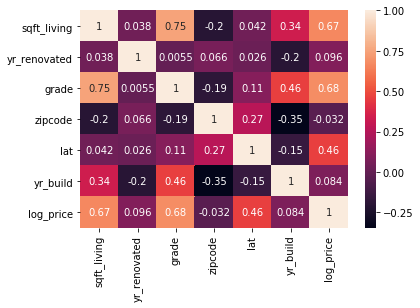

In [20]:
sn.heatmap(pd.concat([predictors,ols_testing.log_price],axis=1).corr(),annot=True)

If you observe the above `heatmap` you will notice `sqft_living` and `grade` have correlation of `0.75` on the scale of `0` to `1` that to high so when we apply the REF we need to remove on of this fields.

## Scaling the features
As we are using RFE we need to make sure the all the attributes are on same scale for that we will scale all the independenet variables with `minmax_scale` this will make get all the data in the scale of `0` to `1`.

## Test # 1 keeping grade and removing sqft_living

In [21]:
scaled_df = pd.DataFrame([])

In [22]:
scaled_df['sqft_living'] = minmax_scale(price_cut_df.sqft_living)
scaled_df['grade'] = minmax_scale(price_cut_df.grade)
scaled_df['lat'] = minmax_scale(price_cut_df.lat)
scaled_df['yr_renovated'] = minmax_scale(price_cut_df.yr_renovated)
scaled_df['yr_build'] = minmax_scale(price_cut_df.yr_built)

C:\Users\mitjp\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
C:\Users\mitjp\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)
C:\Users\mitjp\AppData\Local\conda\conda\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


In [23]:
scaled_df.columns

Index(['sqft_living', 'grade', 'lat', 'yr_renovated', 'yr_build'], dtype='object')

## RFE 
    Now let's import the `RFE` and the `LinearRegression` from `sklearn` package

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
predictors = scaled_df.drop('sqft_living',axis=1)
selector = RFE(linreg,n_features_to_select = 2)
selector = selector.fit(predictors,price_cut_df['log_price'])

In [25]:
predictors.columns

Index(['grade', 'lat', 'yr_renovated', 'yr_build'], dtype='object')

In [26]:
selector.support_

array([ True,  True, False, False])

In [27]:
selector.ranking_

array([1, 1, 3, 2])

In [28]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[2.81839448 0.87793259]
11.157151034329168


Here `n_features_to_select` need to change that values and keep observing the `estimators.coef_` and `estimators.intercept_` if they are effected more with change the in the `n_features_to_select` stop there.

## Model Validation
Scikit-learn has a useful function `train-test-split`. The argument `test_size` makes it possible to choose the size of the test set and training set.

In [29]:
from sklearn.model_selection import train_test_split
y = price_cut_df.log_price
X = predictors
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
linreg.fit(X_train,y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train,y_hat_train)
test_mse = mean_squared_error(y_test,y_hat_test)

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.087497725934591
Test Mean Squarred Error: 0.08827699136786006


## Cross-Validation
 Now the problem with train-test-split when the training set and test set are created the function chooses random data samples from the data. So the MES strongly depend on how the training set and test set were created.
 Consider thhat we creat a 20 train-test-split the MES of all 20 will vary from eachother.So to over come this we apply K-Fold Cross Validation.

scikit-learn provide as `cross_val_score` package. For geting `MES` as an output we specify `scoring` as `neg_mean_squared_error` this return's a negative `MES` so larger is better

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [32]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-0.08792459103363454
-0.08793281048050589
-0.08779960301641392


## Test # 2 with taking sqft_living and removing grade

## RFE

In [33]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
predictors1 = scaled_df.drop('grade',axis=1)
selector = RFE(linreg,n_features_to_select = 2)
selector = selector.fit(predictors1,price_cut_df['log_price'])

In [34]:
predictors1.columns

Index(['sqft_living', 'lat', 'yr_renovated', 'yr_build'], dtype='object')

In [35]:
selector.support_

array([ True,  True, False, False])

In [36]:
selector.ranking_

array([1, 1, 3, 2])

In [37]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[2.76820843 0.97054255]
11.768915369584144


## Model Validation

In [38]:
from sklearn.model_selection import train_test_split
y = price_cut_df.log_price
X = predictors
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
linreg.fit(X_train,y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train,y_hat_train)
test_mse = mean_squared_error(y_test,y_hat_test)

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.08777574186190445
Test Mean Squarred Error: 0.08717553157496584


## Cross Validation

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = np.mean(cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error"))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [41]:
print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-0.08792459103363454
-0.08793281048050589
-0.08779960301641392
